---
$$\Huge \text{Álgebra Lineal Computacional}$$
$$\Huge \text{Trabajo Práctico II}$$

$$\LARGE \text{Contenido Nutricional de la Canasta Básica}$$

$$\LARGE \text{Dante Waisman y Tatiana Grinspan}$$

---

**Consigna 1.- Leer los datos del archivo tabla nutricional.csv. Completar las celdas faltantes con ceros. Poner todos los datos en la misma unidad.**

In [164]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\HP\Desktop\Ciencia de Datos\alc\Enunciado TP2 y datos-20240615\tabla_nutricional.csv",sep = ";")
hoyjuegaargentina = df.copy()
df_sin_normalizar = df.copy()

# Completamos con ceros en vez de Nan
df.fillna(0, inplace=True)

# Convertimos columnas y pasamos todo a gramos
columns_to_convert = ['Na (mg)', 'Ca (mg)', 'Fe (mg)']
df[columns_to_convert] = df[columns_to_convert] * 0.001

# Renombramos las columnas
df.rename(columns=lambda x: x.replace('(mg)', '(gr)'), inplace=True)

**Consigna 2.- Desarrollar una función que reciba como parámetro un DataFrame y que evalúe si las cantidades de los principales elementos de la dieta, proteínas, carbohidratos, grasas, sodio, fibra, frutas y verduras, cumple los márgenes de ingesta de la OMS. Esta función debe devolver VERDADERO si los cumple. Verificar la Canasta Básica con esta función.**

In [165]:
frutasyverduras = ['Acelga', 'Zanahoria', 'Tomate', 'Lechuga', 'Cebolla', 'Zapallo', 
                   'Manzana', 'Naranja', 'Mandarina', 'Pera', 'Banana', 'Papa', 
                   'Batata', 'Arvejas en lata', 'Tomate envasado']

# Esta función evalúa si la tabla de alimentos cumple con los parámetros requeridos

def cumple_parametros(tabla):
    # Eliminamos la columna 'Cantidad (gr/ml)' del DataFrame 'tabla'
    numeric_df11 = tabla.drop(columns=['Cantidad (gr/ml)'])

    # Seleccionamos solo las columnas con datos numéricos del DataFrame 'tabla'
    numeric_df11 = tabla.select_dtypes(include='number')

    total_gramos = numeric_df11.sum().sum()  # Suma todas las columnas para obtener el total de gramos
    
    if not ((tabla['Grasas (gr)'].sum() / total_gramos * 100 >= total_gramos * 0.15) and 
        (tabla['Grasas (gr)'].sum() / total_gramos * 100 <= total_gramos * 0.30)):
        return False,"no cumple con las Grasas",tabla['Grasas (gr)'].sum() / total_gramos * 100
    
    if not ((tabla['Proteinas (gr)'].sum() / total_gramos * 100 >= total_gramos * 0.10) and 
        (tabla['Proteinas (gr)'].sum() / total_gramos * 100 <= total_gramos * 0.15)):
        return False,"no cumple con las proteinas",tabla['Proteinas (gr)'].sum() / total_gramos * 100
    
    if not ((tabla['HC (gr)'].sum() / total_gramos * 100 >= total_gramos * 0.55) and 
        (tabla['HC (gr)'].sum() / total_gramos * 100 <= total_gramos * 0.75)):
        return False,"no cumple con los HC",tabla['HC (gr)'].sum() / total_gramos * 100
    
    if (tabla['Na (gr)'].sum() != 0.2):
        return False,"no cumple con el sodio",tabla['Na (gr)'].sum() / total_gramos * 100
    
    if not (tabla['Fibra (gr)'].sum() > 25):
        return False,"no cumple con las fibras",tabla['Fibra (gr)'].sum() / total_gramos * 100
    
    cantfrutas = 0
    for elem, cantidad in zip(tabla['Alimentos'], tabla['Cantidad (gr/ml)']):
        if elem in frutasyverduras:
            cantfrutas += cantidad
            
    if (cantfrutas<400):
        return False,"no cumple con las frutas", cantfrutas
    
    return True
    
print(cumple_parametros(df))

(False, 'no cumple con las Grasas', 2.8899176279050502)


La función devuelve False, lo que significa que la canasta básica no cumple con los márgenes de ingesta recomendados por la OMS para uno o más de los elementos evaluados. Concluimos entonces que la canasta básica puede tener una deficiencia o exceso de uno o varios nutrientes esenciales, y que podría necesario revisar y ajustar la composición de la canasta básica para asegurarse de que proporcione una nutrición adecuada según las recomendaciones de la OMS.

**Consigna 3.- Realizar un Análisis en Componentes Principales (ACP), tomando el valor nutricional de cada alimento por gramo. Graficar cada alimento como un punto en ejes coordenados del nuevo espacio creado por los autovectores generadores del ACP. En este gráfico, analizar los clusteres que quedan planteados por la proyección.**

In [166]:
import numpy as np 



# Obtenemos las columnas que se deben dividir, excluyendo 'Alimento'
columnas_a_dividir = df.columns.difference(['Alimento'])

# Dividimos cada columna en 'columnas_a_dividir' por 'Cantidad (gr/ml)' y reasigna el resultado al DataFrame
df[columnas_a_dividir] = df[columnas_a_dividir].div(df['Cantidad (gr/ml)'], axis=0)

# Convertimos la columna 'Cantidad (gr/ml)' a valores numéricos, manejando errores como NaN
df['Cantidad (gr/ml)'] = pd.to_numeric(df['Cantidad (gr/ml)'], errors='coerce')

# Seleccionamos solo las columnas con datos numéricos del DataFrame
numeric_df = df.select_dtypes(include='number')


def normalizar_datos(X):
    n = X.shape[0]

    # Calculamos la media de cada característica
    X_mean = np.mean(X, axis=0)
     # Estandarización
    X_estandar = (X - X_mean)

    return X_estandar, X_mean
# Ejemplo de uso
numeric_df, X_mean = normalizar_datos(numeric_df)

matriz_covarianza = np.cov(numeric_df, rowvar=False)

n = numeric_df.shape[0]


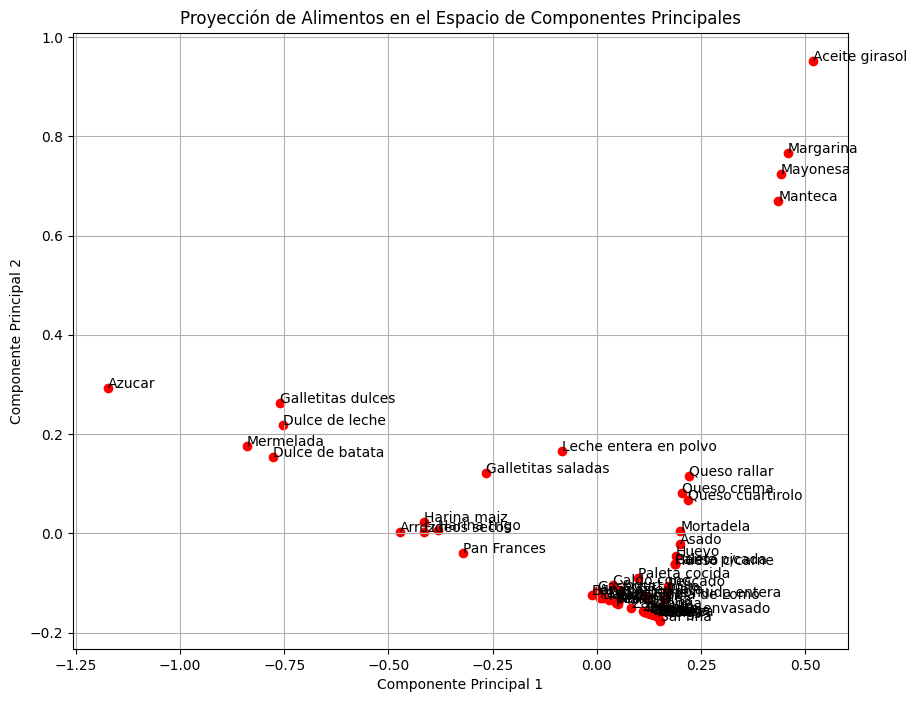

In [167]:
### usamos la funcion del laboratorio
import numpy as np
import matplotlib.pyplot as plt

def calculoACP(data):
    d, n = data.shape
    m=np.mean(data, axis=1)

    X = data - np.tile(m.reshape((len(m), 1)), (1, n))
    Mcov = np.dot(X,X.T) / n # Covariance Matrix

    D, V = np.linalg.eigh(Mcov)

    # ordenamos los autovalores de mayor a menor
    idx = np.argsort (- D )
    D = D[idx]
    V = V[:, idx]

    return D, V, X, m



#Realizamos el calculoACP
D, V, X, m = calculoACP(np.array(numeric_df.T))



# Proyectamos los datos centrados con las primeras 2 componentes principales
proyeccion = np.dot(X.T, V[:, 0:2])

# Creamos un gráfico 2D de los datos proyectados
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Dibujamos los puntos para cada alimento
ax.scatter(proyeccion[:, 0], proyeccion[:, 1], c='r', marker='o')

nombres = df['Alimento']
for i, nombre in enumerate(nombres):
    ax.annotate(nombre, (proyeccion[i, 0], proyeccion[i, 1]))

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de Alimentos en el Espacio de Componentes Principales')
plt.grid(True)
plt.show()


En el gráfico obtenido podemos observar algunos clusteres. Por un lado tenemos arriba a la derecha, alimentos como aceite girasol, mayonesa, margarina y manteca, todos productos alimenticios ricos en grasas que aportan una cantidad significativa de calorías debido a su alto contenido graso.
Por la parte de abajo tenemos alimentos como leche entera en polvo y quesos, fuentes importantes de calcio y proteínas.
Arriba a la izquierda vemos productos dulces como el azucar, la mermelada y el dulce de batata, que proporcionan principalmente carbohidratos.
En el medio del gráfico tenemos una nube de alimentos mas dificil de distinguir clusteres, pero sí notamos dos grupos claramente separados que son: las carnes por un lado (ricas en proteinas, hierro, vitaminas, zinc, etc.) y las harinas por el otro (ricas en carbohidratos, fibra, etc.).

**Consigna 4.- Proyectar los alimentos de la tabla de Consumidores libres en el espacio de generadores del ACP.**

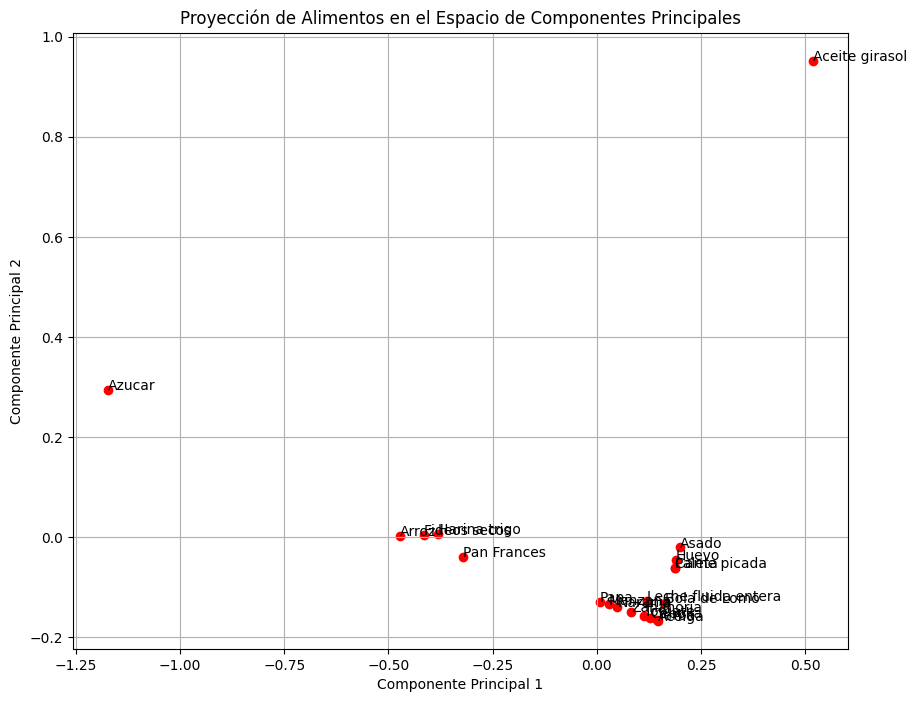

In [168]:
import numpy as np
import matplotlib.pyplot as plt

# Cargamos el archivo CSV de consumidores libres
consumidores_libres = pd.read_csv(r"C:\Users\HP\Desktop\Ciencia de Datos\alc\Enunciado TP2 y datos-20240615\consumidores_libres.csv", sep=";")

# Creamos una copia del DataFrame original para trabajar con los productos por gramo
producto_por_gramo = consumidores_libres.copy()

# Seleccionamos solo las columnas numéricas del DataFrame original
numeric_consumidores_libres = consumidores_libres.select_dtypes(include='number')


def normalizar_datos(X):
    n = X.shape[0]

    # Promedio sobre todas las filas (axis=0)
    X_mean = np.sum(X, axis=0) / n
    
    # Desviación estándar sobre todas las filas (axis=0)
    X_std = np.sqrt(np.sum((X - X_mean) ** 2, axis=0) / n)

    
    # Estandarización
    X_estandar = (X - X_mean) 

    return X_estandar, X_mean

#Cargamos a mano los alimentos que nos interesan (expecto berenjena)
alimentos_consumidores = ["Aceite girasol", "Arroz", "Azucar", "Fideos secos", "Harina trigo", "Huevo", "Pan Frances", "Leche fluida entera", "Yerba",
                          "Zanahoria", "Tomate", "Cebolla", "Papa", "Acelga", "Naranja", "Manzana", "Bola de Lomo",
                          "Asado",  "Carne picada", "Paleta "]


#Tomo los indices que tenian en la tabla original
indices_alimentos_consumidores = [] #Me guardo la lista con los indices
for alimento in alimentos_consumidores:
    indice = df[df['Alimento'] == alimento].index[0]  # Obtengo el índice del alimento en el DataFrame original
    indices_alimentos_consumidores.append(indice)


#De cada uno de estos queremos hacer proyeccion en el pca

#Solo tomos los indices que me interesan
proyeccion_alimentos_consumidores = proyeccion[indices_alimentos_consumidores]



# Creamos un gráfico 2D de los datos proyectados
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Dibujamos los puntos para cada alimento
ax.scatter(proyeccion_alimentos_consumidores[:, 0], proyeccion_alimentos_consumidores[:, 1], c='r', marker='o')

nombres = df.loc[indices_alimentos_consumidores, 'Alimento']
for i, nombre in enumerate(nombres):
    ax.annotate(nombre, (proyeccion_alimentos_consumidores[i, 0], proyeccion_alimentos_consumidores[i, 1]))
    
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de Alimentos en el Espacio de Componentes Principales')
plt.grid(True)
plt.show()

**Consigna 5.- Aplicar Mínimos Cuadrados sobre los precios de cada nutriente (HC, Proteínas y grasas) para evaluar el aumento en estos 4 meses. Graficar cada punto de cada alimento y la recta obtenida por Mínimos Cuadrados. Hacer una tabla de los aumentos.**

In [169]:
# Agregamos a la tabla original el porcentaje de cada nutriente
df['porcentaje_grasa'] = df['Grasas (gr)']/(df['Grasas (gr)'] + df['HC (gr)'] + df['Proteinas (gr)'])
df['porcentaje_proteina'] = df['Proteinas (gr)']/(df['Grasas (gr)'] + df['HC (gr)'] + df['Proteinas (gr)'])
df['porcentaje_HC'] = df['HC (gr)']/(df['Grasas (gr)'] + df['HC (gr)'] + df['Proteinas (gr)'])

# Dividimos todas las columnas (excepto 'Producto' y 'Cantidad (g)') por 'Cantidad (g)'
columnas_a_dividir = consumidores_libres.columns.difference(['PRODUCTOS', 'Cantidad'])

# Dividimos cada columna en 'columnas_a_dividir' por 'Cantidad (g)' y re-asignamos al DataFrame
producto_por_gramo[columnas_a_dividir] = producto_por_gramo[columnas_a_dividir].div(producto_por_gramo['Cantidad'], axis=0)

# Nos aseguramos de que la columna 'Cantidad (g)' sea 1
producto_por_gramo['Cantidad'] = 1


alimentos_consumidores = ["Aceite girasol", "Arroz", "Azucar", "Fideos secos", "Harina trigo", "Huevo", "Pan Frances", "Leche fluida entera", "Yerba",
                          "Zanahoria", "Tomate", "Cebolla", "Papa", "Acelga", "Naranja", "Manzana", "Bola de Lomo",
                          "Asado", "Paleta ", "Carne picada"]

producto_por_gramo = producto_por_gramo.drop(index=10)

producto_por_gramo['PRODUCTOS'] = alimentos_consumidores

df_copia = df.copy()

df_copia = df_copia[['Alimento','porcentaje_grasa','porcentaje_proteina','porcentaje_HC']]

# Realizamos la combinación de las dos tablas (merge) para obtener los productos que queremos evaluar
output = pd.merge(left=producto_por_gramo, right=df_copia, left_on='PRODUCTOS', right_on='Alimento', how='left')

# A continuación, calculamos el precio de cada nutriente en los cinco meses del año
# Consideramos solo elementos que tengan valores distintos de cero, y luego nos aseguramos de sacar los Nan

# Con las proteinas: 

tabla_con_proteinas = output[output['porcentaje_proteina'] != 0]

tabla_con_proteinas['precio_proteina_diciembre'] = tabla_con_proteinas['31/12/2023'] / tabla_con_proteinas['porcentaje_proteina']     
tabla_con_proteinas['precio_proteina_enero'] = tabla_con_proteinas['31/1/2024'] / tabla_con_proteinas['porcentaje_proteina'] 
tabla_con_proteinas['precio_proteina_febrero'] = tabla_con_proteinas['29/2/2024'] / tabla_con_proteinas['porcentaje_proteina'] 
tabla_con_proteinas['precio_proteina_marzo'] = tabla_con_proteinas['31/3/2024'] / tabla_con_proteinas['porcentaje_proteina'] 
tabla_con_proteinas['precio_proteina_abril'] = tabla_con_proteinas['30/4/2024'] / tabla_con_proteinas['porcentaje_proteina'] 

output.fillna(value=0, inplace=True)

# Con los hidratos de carbono:

tabla_con_HC = output[output['porcentaje_HC'] != 0]

tabla_con_HC['precio_HC_diciembre'] = tabla_con_HC['31/12/2023'] / tabla_con_HC['porcentaje_HC'] 
tabla_con_HC['precio_HC_enero'] = tabla_con_HC['31/1/2024'] / tabla_con_HC['porcentaje_HC'] 
tabla_con_HC['precio_HC_febrero'] = tabla_con_HC['29/2/2024'] / tabla_con_HC['porcentaje_HC'] 
tabla_con_HC['precio_HC_marzo'] = tabla_con_HC['31/3/2024'] / tabla_con_HC['porcentaje_HC'] 
tabla_con_HC['precio_HC_abril'] = tabla_con_HC['30/4/2024'] / tabla_con_HC['porcentaje_HC'] 

output.fillna(value=0, inplace=True)

# Con las grasas:

tabla_con_grasa = output[output['porcentaje_grasa'] != 0]

tabla_con_grasa['precio_Grasas_diciembre'] = tabla_con_grasa['31/12/2023'] / tabla_con_grasa['porcentaje_grasa'] 
tabla_con_grasa['precio_Grasas_enero'] = tabla_con_grasa['31/1/2024'] / tabla_con_grasa['porcentaje_grasa'] 
tabla_con_grasa['precio_Grasas_febrero'] = tabla_con_grasa['29/2/2024'] / tabla_con_grasa['porcentaje_grasa'] 
tabla_con_grasa['precio_Grasas_marzo'] = tabla_con_grasa['31/3/2024'] / tabla_con_grasa['porcentaje_grasa'] 
tabla_con_grasa['precio_Grasas_abril'] = tabla_con_grasa['30/4/2024'] / tabla_con_grasa['porcentaje_grasa']   

output.fillna(value=0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16780\296671759.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_con_proteinas['precio_proteina_diciembre'] = tabla_con_proteinas['31/12/2023'] / tabla_con_proteinas['porcentaje_proteina']
C:\Users\HP\AppData\Local\Temp\ipykernel_16780\296671759.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_con_proteinas['precio_proteina_enero'] = tabla_con_proteinas['31/1/2024'] / tabla_con_proteinas['porcentaje_proteina']
C:\Users\HP\AppData\Local\Temp\ipyker

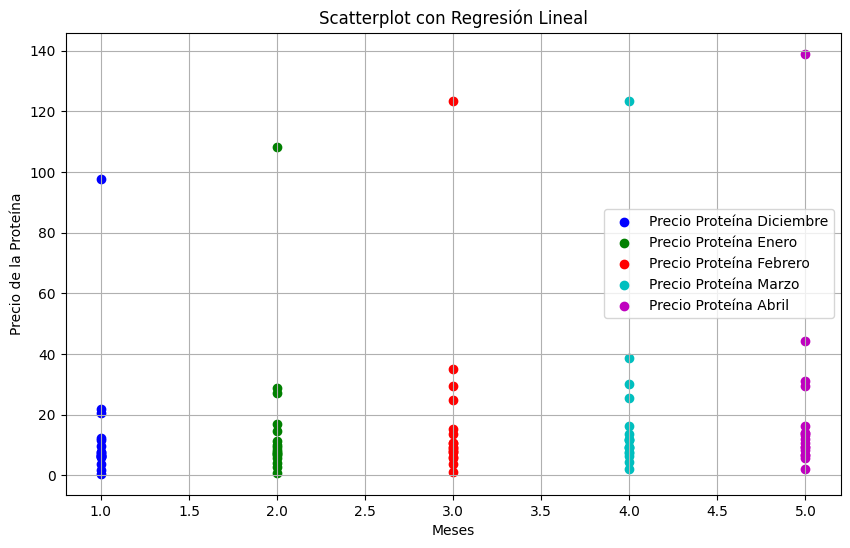

In [170]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

tabla_con_proteinas = tabla_con_proteinas.drop(tabla_con_proteinas.index[6])

longitud = len(tabla_con_proteinas['precio_proteina_diciembre'])

# Creamos una lista de unos usando comprensión de listas
lista_unos = [1] * longitud
lista_dos = [2] * longitud
lista_tres = [3] * longitud
lista_cuatro = [4] * longitud
lista_cinco = [5] * longitud

# Creamos el scatterplot vertical
longitud = len(tabla_con_proteinas['precio_proteina_diciembre'])
lista_unos = [1] * longitud
lista_dos = [2] * longitud
lista_tres = [3] * longitud
lista_cuatro = [4] * longitud
lista_cinco = [5] * longitud

plt.figure(figsize=(10, 6))  # Tamaño de la figura (ancho, alto)

# Scatterplots para cada conjunto de datos
plt.scatter(x=lista_unos, y=tabla_con_proteinas['precio_proteina_diciembre'], marker='o', color='b', label='Precio Proteína Diciembre')
plt.scatter(x=lista_dos, y=tabla_con_proteinas['precio_proteina_enero'], marker='o', color='g', label='Precio Proteína Enero')
plt.scatter(x=lista_tres, y=tabla_con_proteinas['precio_proteina_febrero'], marker='o', color='r', label='Precio Proteína Febrero')
plt.scatter(x=lista_cuatro, y=tabla_con_proteinas['precio_proteina_marzo'], marker='o', color='c', label='Precio Proteína Marzo')
plt.scatter(x=lista_cinco, y=tabla_con_proteinas['precio_proteina_abril'], marker='o', color='m', label='Precio Proteína Abril')

# Añadimos etiquetas y título
plt.xlabel('Meses')
plt.ylabel('Precio de la Proteína')
plt.title('Scatterplot con Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

Este gráfico nos pareció interesante. Notamos que todos los precios de la proteina de distintos alimentos van aumentando a lo largo de los meses. Vemos que hay puntos muy comprimidos en un mismo sector, mientras que algunos se alejan mucho del promedio, generando una gran diferencia de precios.

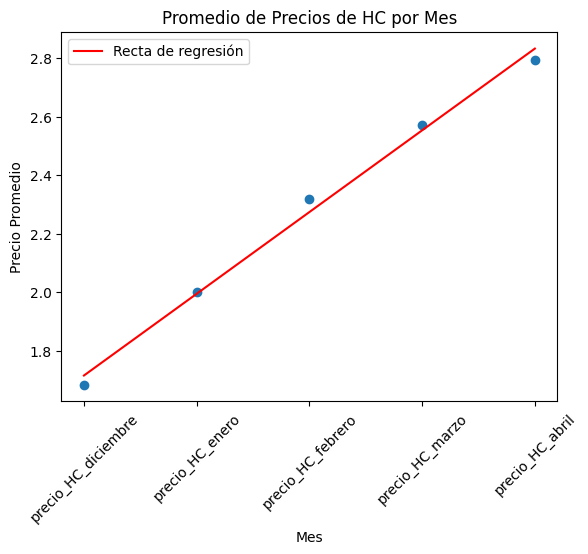

precio_HC_diciembre    1.684951
precio_HC_enero        2.000205
precio_HC_febrero      2.319534
precio_HC_marzo        2.572989
precio_HC_abril        2.794761
dtype: float64


In [173]:
promedios = tabla_con_HC.copy()
promedio_HCs = tabla_con_HC[['precio_HC_diciembre', 'precio_HC_enero', 'precio_HC_febrero', 'precio_HC_marzo', 'precio_HC_abril']].mean()

def cuadrados_minimos(promedio_HCs):
    # Creamos la matriz de Vandermonde
    matriz_vandermonde = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]])

    # Nos aseguramos de que promedio_HCs sea un array de numpy
    y = promedio_HCs.values

    # Resolvemos el sistema de ecuaciones usando el método de cuadrados mínimos
    a = np.linalg.solve(matriz_vandermonde.T @ matriz_vandermonde, matriz_vandermonde.T @ y)
    
    return a

# Llamamos a la función y obtener el resultado
resultados_HC = cuadrados_minimos(promedio_HCs)

plt.scatter(promedio_HCs.index, promedio_HCs.values)
plt.title('Promedio de Precios de HC por Mes')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para una mejor legibilidad
# Calculamos los valores de la recta de regresión
x_vals = np.array([1, 2, 3, 4, 5])
y_vals = resultados_HC[0] + resultados_HC[1] * x_vals

plt.plot(['precio_HC_diciembre', 'precio_HC_enero', 'precio_HC_febrero', 'precio_HC_marzo', 'precio_HC_abril'], y_vals, color='red', label='Recta de regresión')
plt.legend()
plt.show()

print(promedio_HCs)

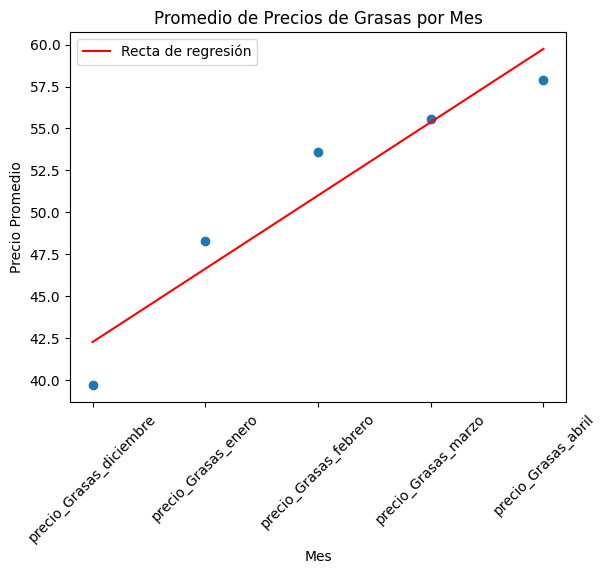

precio_Grasas_diciembre    39.705719
precio_Grasas_enero        48.263615
precio_Grasas_febrero      53.575019
precio_Grasas_marzo        55.555445
precio_Grasas_abril        57.913306
dtype: float64


In [174]:
promedios = tabla_con_grasa.copy()
promedio_Grasass = tabla_con_grasa[['precio_Grasas_diciembre', 'precio_Grasas_enero', 'precio_Grasas_febrero', 'precio_Grasas_marzo', 'precio_Grasas_abril']].mean()

def cuadrados_minimos(promedio_Grasass):
    # Creamos la matriz de Vandermonde
    matriz_vandermonde = np.array([[1,1],[1,2],[1,3],[1,4],[1,5]])

    # Nos aseguramos de que promedio_Grasass sea un array de numpy
    y = promedio_Grasass.values

    # Resolvemos el sistema de ecuaciones usando el método de cuadrados mínimos
    a = np.linalg.solve(matriz_vandermonde.T @ matriz_vandermonde, matriz_vandermonde.T @ y)
    
    return a

# Llamamos a la función y obtener el resultado
resultados_grasas = cuadrados_minimos(promedio_Grasass)

plt.scatter(promedio_Grasass.index, promedio_Grasass.values)
plt.title('Promedio de Precios de Grasas por Mes')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para una mejor legibilidad
# Calculamos los valores de la recta de regresión
x_vals = np.array([1, 2, 3, 4, 5])
y_vals = resultados_grasas[0] + resultados_grasas[1] * x_vals

plt.plot(['precio_Grasas_diciembre', 'precio_Grasas_enero', 'precio_Grasas_febrero', 'precio_Grasas_marzo', 'precio_Grasas_abril'], y_vals, color='red', label='Recta de regresión')
plt.legend()
plt.show()

print(promedio_Grasass)

En los tres gráficos (grasas, proteinas y HC), observamos que las líneas rectas que conectan los puntos de los scatter plots son crecientes, lo cual indica que los precios están aumentando a lo largo de los meses representados en los ejes x (hay una tendencia de aumento de precios).
A su vez, los scatter plots muestran puntos dispersos alrededor de las líneas rectas, lo que indica que hay variabilidad en los precios mes a mes.

**Consigna 6.- Comparar el aumento de la carne en comparación con los otros rubros. Si la gente consume ese porcentaje menos de carne, cómo queda la ingesta individual con respecto a la tabla de metas de la OMS?**

In [176]:
alimentos_consumidores = ["Aceite girasol", "Arroz", "Azucar", "Fideos secos", "Harina trigo", "Huevo", "Pan Frances", "Leche fluida entera", "Yerba",
                          "Zanahoria", "Tomate", "Cebolla", "Papa", "Acelga", "Naranja", "Manzana", "Bola de Lomo",
                          "Asado", "Paleta ", "Carne picada"]

tabla_con_carnes = output[output['porcentaje_proteina'].isin(["Bola de Lomo", "Asado", "Paleta", "Carne picada"])]

In [177]:
# Dividimos el DataFrame en dos partes: los productos con carne y los productos restantes
producto_por_gramo_resto = producto_por_gramo.iloc[0:16]  # Primeras 16 filas
producto_por_gramo_carnes = producto_por_gramo.iloc[16:20]  # Filas 16 a 19

# Calculamos el aumento porcentual en el precio promedio de los productos de carne
aumento_carne = producto_por_gramo_carnes['30/4/2024'].sum() / producto_por_gramo_carnes['31/12/2023'].sum()
print(aumento_carne)

# Calculamos el aumento porcentual en el precio promedio de los productos restantes
aumento_resto = producto_por_gramo_resto['30/4/2024'].sum() / producto_por_gramo_resto['31/12/2023'].sum()
print(aumento_resto)

1.419047619047619
1.7277461058490822


Vemos que la carne aumentó 41% y el resto de los alimentos un 72%.

In [178]:
df_con_menos_carne = df_sin_normalizar.copy()
columns_to_multiply = df_con_menos_carne.columns.difference(['Alimento', 'Cantidades'])

# Multiplicamos por 0.82 las filas del índice 7 al 14 en las columnas seleccionadas debido a la disminución del 18.5% de la carne
df_con_menos_carne.loc[7:14, columns_to_multiply] = df_con_menos_carne.loc[7:14, columns_to_multiply] * 0.82

# Llamamos a la función 'cumple_parametros' para evaluar si el DataFrame modificado cumple con los criterios
cumple_parametros(df_con_menos_carne)

(False, 'no cumple con las Grasas', 1.1107654905545024)

La función devuelve False, igual que en el ejercicio 2, lo que significa que nuevamente la canasta básica no cumple con los márgenes de ingesta recomendados por la OMS.

**Consigna 7.- Proponer dos alimentos de la tabla 3 que lleguen a reemplazar la disminución del 18.5 % de la carne sin perder valor nutricional. Corroborar con la tabla de metas de la OMS la dieta diaria obtenida. Además, se pone como restricción en la elección, que el precio de los alimentos de reemplazo debe ser menor al 50 % del aumento de la carne.**

In [179]:
columnas_para_restar = df_con_menos_carne.columns.difference(['Alimento'])

# Calculamos la diferencia entre las versiones original y modificada del DataFrame
cambios_post = df_sin_normalizar[columnas_para_restar] - df_con_menos_carne[columnas_para_restar]

# Seleccionamos las filas del índice 7 al 14 para el análisis de cambios
cambios_post = cambios_post.loc[7:14]
print("Necesito " + str(cambios_post['Proteinas (gr)'].sum()) + "gr de proteina")
print("Necesito " + str(cambios_post['HC (gr)'].sum()) + "gr de Hidratos de Carbono")
print("Necesito " + str(cambios_post['Grasas (gr)'].sum()) + "gr de grasas")

print(cambios_post['Cantidad (gr/ml)'].sum())

Necesito 8.109000000000002gr de proteina
Necesito 0.09720000000000001gr de Hidratos de Carbono
Necesito 3.067200000000001gr de grasas
40.32000000000001


Para satisfacer nuestras necesidades de proteínas y grasas, podemos considerar alimentos como la leche y el huevo. Después de evaluar las cantidades y costos, llegamos a las siguientes conclusiones:

Huevos: 1 gramo cuesta 5,27 pesos. Con 25,42 gramos de huevo obtenemos 3 gramos de proteínas y 3 gramos de grasa, costando 131 pesos.

Pan: 1 gramo cuesta 2,3 pesos. Con 50 gramos de pan obtenemos 5 gramos de proteínas, costando 115 pesos.

En total, con una canasta básica que incluye 40 gramos de carne (a un promedio de 7 pesos por gramo), el costo es de 280 pesos.
En resumen, aunque la reducción en el costo no es significativa, encontramos que esta combinación de alimentos es la más económica sin comprometer nuestras necesidades nutricionales.

In [180]:
df_con_mas_PanHuevo = df_sin_normalizar.copy()
columns_to_multiply = df_con_mas_PanHuevo.columns.difference(['Alimento', 'Cantidades'])

# Aplicamos multiplicadores específicos a filas seleccionadas del DataFrame
df_con_mas_PanHuevo.loc[6, columns_to_multiply] = df_con_mas_PanHuevo.loc[5, columns_to_multiply] * 2.56
df_con_mas_PanHuevo.loc[26, columns_to_multiply] = df_con_mas_PanHuevo.loc[6, columns_to_multiply] * 1.21

# Llamamos a la función 'cumple_parametros' para evaluar si el DataFrame modificado cumple con los criterios
cumple_parametros(df_con_mas_PanHuevo)

(False, 'no cumple con las Grasas', 1.2646980879531915)

Notamos que nuevamente la canasta básica no cumple con los márgenes de ingesta recomendados por la OMS, incluso con esta modificación.

**Consigna 8.- Proponer dos alimentos de la tabla 1 lejanos en el sentido de distancia Euclideana del espacio de generadores del ACP, que reemplacen la cantidad de proteína perdida. Se pueden usar todos los alimentos de la tabla 1. Corroborar como varían los objetivos ahora en la tabla de metas de la OMS en cada caso.**


Decidimos que una alternativa viable, usando la distancia euclidiana, es el queso de rallar y el aceite de girasol. Para obtener 8 gramos de proteína, necesitamos aproximadamente 25 gramos de queso de rallar. Para obtener 3 gramos de grasas, necesitamos 3 gramos de aceite de girasol.

In [181]:
df_con_aceite_y_queso = df_sin_normalizar.copy()

# Ajustamos específicamente la fila 33 para incrementar la cantidad y grasas
df_con_aceite_y_queso['Cantidad (gr/ml)'].loc[33] = df_con_aceite_y_queso['Cantidad (gr/ml)'].loc[33] + 3
df_con_aceite_y_queso['Grasas (gr)'].loc[33] = df_con_aceite_y_queso['Grasas (gr)'].loc[33] + 3

columns_to_multiply = df_con_aceite_y_queso.columns.difference(['Alimento', 'Cantidades'])

# Multiplicamos por 16 los valores de las columnas seleccionadas en la fila con índice 5
df_con_aceite_y_queso.loc[5, columns_to_multiply] = df_con_aceite_y_queso.loc[5, columns_to_multiply] * 16

# Llamamos a la función 'cumple_parametros' para evaluar si el DataFrame modificado cumple con los criterios
cumple_parametros(df_con_aceite_y_queso)

C:\Users\HP\AppData\Local\Temp\ipykernel_16780\2847734165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_aceite_y_queso['Cantidad (gr/ml)'].loc[33] = df_con_aceite_y_queso['Cantidad (gr/ml)'].loc[33] + 3
C:\Users\HP\AppData\Local\Temp\ipykernel_16780\2847734165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_aceite_y_queso['Grasas (gr)'].loc[33] = df_con_aceite_y_queso['Grasas (gr)'].loc[33] + 3


(False, 'no cumple con las Grasas', 1.1815725887048636)

Notamos que nuevamente la canasta básica no cumple con los márgenes de ingesta recomendados por la OMS, incluso con esta modificación.